In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import rcParams
import seaborn as sns

file_path = "../Data/Raw/pcos.csv"

# Read the Excel file into a Pandas DataFrame
df = pd.read_csv(file_path)
df = df.drop(['Unnamed: 44','Sl. No','Patient File No.'],axis=1)
df['Marraige Status (Yrs)'] = df['Marraige Status (Yrs)'].fillna(np.mean(df['Marraige Status (Yrs)']))

# fill missing values with the mode
mode_value = df["Fast food (Y/N)"].mode()[0] 
df["Fast food (Y/N)"].fillna(mode_value, inplace=True)
print(df.head())

   PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0           0          28         44.6        152.0  19.304017           15   
1           0          36         65.0        161.5  24.921163           15   
2           1          33         68.8        165.0  25.270891           11   
3           0          37         65.0        148.0  29.674945           13   
4           0          25         52.0        161.0  20.060954           11   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                78                22     10.48           2  ...   
1                74                20     11.70           2  ...   
2                72                18     11.80           2  ...   
3                72                20     12.00           2  ...   
4                72                18     10.00           2  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0        

In [2]:
# Change the datatype
df_numeric = df.iloc[:, list(range(1, 5)) + list(range(6, 9))+ list(range(10, 12))+ list(range(13, 28))+ list(range(35, 42))]
df_numeric = df_numeric.copy()
df_numeric.loc[:,'AMH(ng/mL)'] = df_numeric.loc[:,'AMH(ng/mL)'].astype('float64')
df_numeric.loc[:,'II    beta-HCG(mIU/mL)'] = df_numeric.loc[:,'II    beta-HCG(mIU/mL)'].astype('float64')
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Age (yrs)              541 non-null    int64  
 1   Weight (Kg)             541 non-null    float64
 2   Height(Cm)              541 non-null    float64
 3   BMI                     541 non-null    float64
 4   Pulse rate(bpm)         541 non-null    int64  
 5   RR (breaths/min)        541 non-null    int64  
 6   Hb(g/dl)                541 non-null    float64
 7   Cycle length(days)      541 non-null    int64  
 8   Marraige Status (Yrs)   541 non-null    float64
 9   No. of aborptions       541 non-null    int64  
 10    I   beta-HCG(mIU/mL)  541 non-null    float64
 11  II    beta-HCG(mIU/mL)  541 non-null    float64
 12  FSH(mIU/mL)             541 non-null    float64
 13  LH(mIU/mL)              541 non-null    float64
 14  FSH/LH                  541 non-null    fl

In [3]:
df_numeric.describe().round(2).to_csv('../Data/Raw/statistics.csv')

## Show the distribution of the target variable.

In [4]:
# Check whether the samples are balanced
df['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [5]:
# Plot the targets
value_counts = df['PCOS (Y/N)'].value_counts().reset_index()

# Create a custom DataFrame with colors for each category
color_mapping = {1: 'Yes',0: 'No'}
value_counts['Status'] = value_counts['index'].map(color_mapping)

# Create a bar plot
fig = px.bar(value_counts, x='index', y='PCOS (Y/N)', color='Status',color_discrete_map={'Yes':'#e85d04','No':'#4f772d'})
fig.update_layout(xaxis_title='Count', yaxis_title='PCOS (Y/N)')
fig.update_layout(title='PCOS (Y/N) Distribution')
fig.show()


## Show the pairplot of the ten most correlated variables

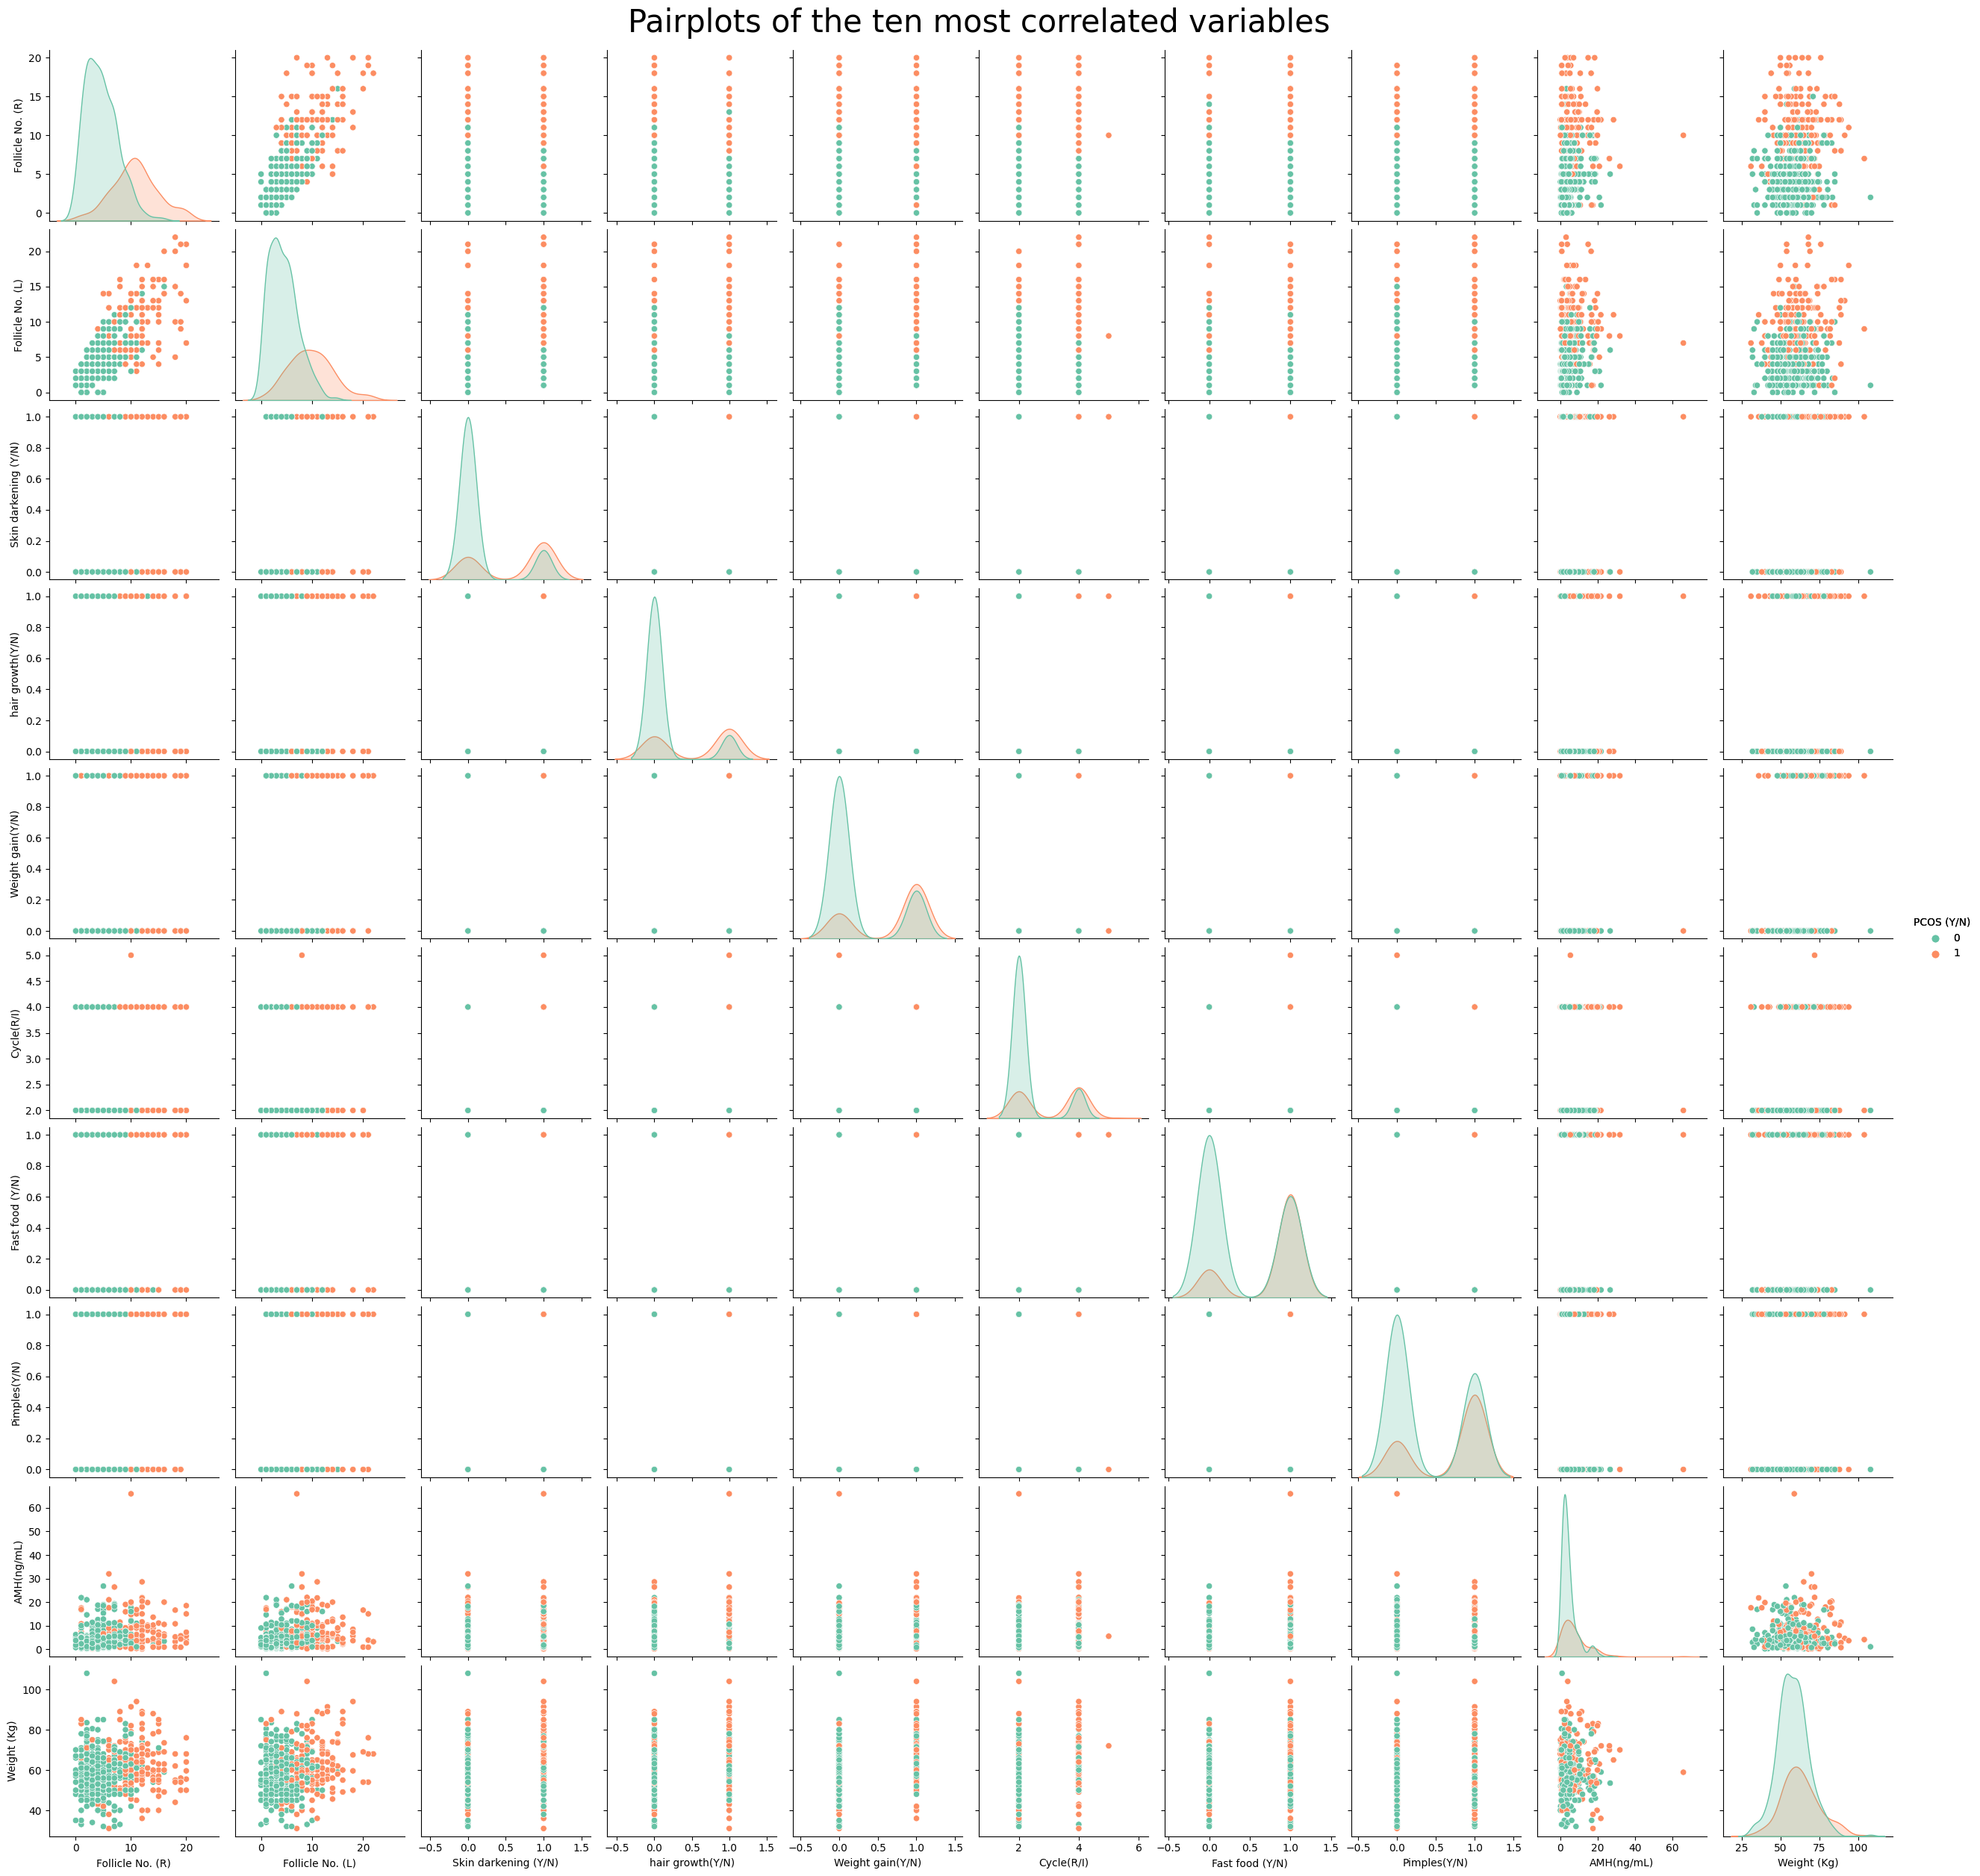

In [6]:
# Generate the pairplots for the ten most correlated variables
import seaborn as sns
import matplotlib.pyplot as plt
df_new = df[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)','Pimples(Y/N)','AMH(ng/mL)','Weight (Kg)']]
p = sns.pairplot(df_new, diag_kind='kde',hue="PCOS (Y/N)",palette='Set2')
p.add_legend()
plt.suptitle('Pairplots of the ten most correlated variables',y=1.01,fontsize=30)
plt.show()

## Show the correlation plot of the variables

[Text(0.5, 0, 'PCOS (Y/N)'),
 Text(1.5, 0, ' Age (yrs)'),
 Text(2.5, 0, 'Weight (Kg)'),
 Text(3.5, 0, 'Height(Cm) '),
 Text(4.5, 0, 'BMI'),
 Text(5.5, 0, 'Blood Group'),
 Text(6.5, 0, 'Pulse rate(bpm) '),
 Text(7.5, 0, 'RR (breaths/min)'),
 Text(8.5, 0, 'Hb(g/dl)'),
 Text(9.5, 0, 'Cycle(R/I)'),
 Text(10.5, 0, 'Cycle length(days)'),
 Text(11.5, 0, 'Marraige Status (Yrs)'),
 Text(12.5, 0, 'Pregnant(Y/N)'),
 Text(13.5, 0, 'No. of aborptions'),
 Text(14.5, 0, '  I   beta-HCG(mIU/mL)'),
 Text(15.5, 0, 'II    beta-HCG(mIU/mL)'),
 Text(16.5, 0, 'FSH(mIU/mL)'),
 Text(17.5, 0, 'LH(mIU/mL)'),
 Text(18.5, 0, 'FSH/LH'),
 Text(19.5, 0, 'Hip(inch)'),
 Text(20.5, 0, 'Waist(inch)'),
 Text(21.5, 0, 'Waist:Hip Ratio'),
 Text(22.5, 0, 'TSH (mIU/L)'),
 Text(23.5, 0, 'AMH(ng/mL)'),
 Text(24.5, 0, 'PRL(ng/mL)'),
 Text(25.5, 0, 'Vit D3 (ng/mL)'),
 Text(26.5, 0, 'PRG(ng/mL)'),
 Text(27.5, 0, 'RBS(mg/dl)'),
 Text(28.5, 0, 'Weight gain(Y/N)'),
 Text(29.5, 0, 'hair growth(Y/N)'),
 Text(30.5, 0, 'Skin darkening (

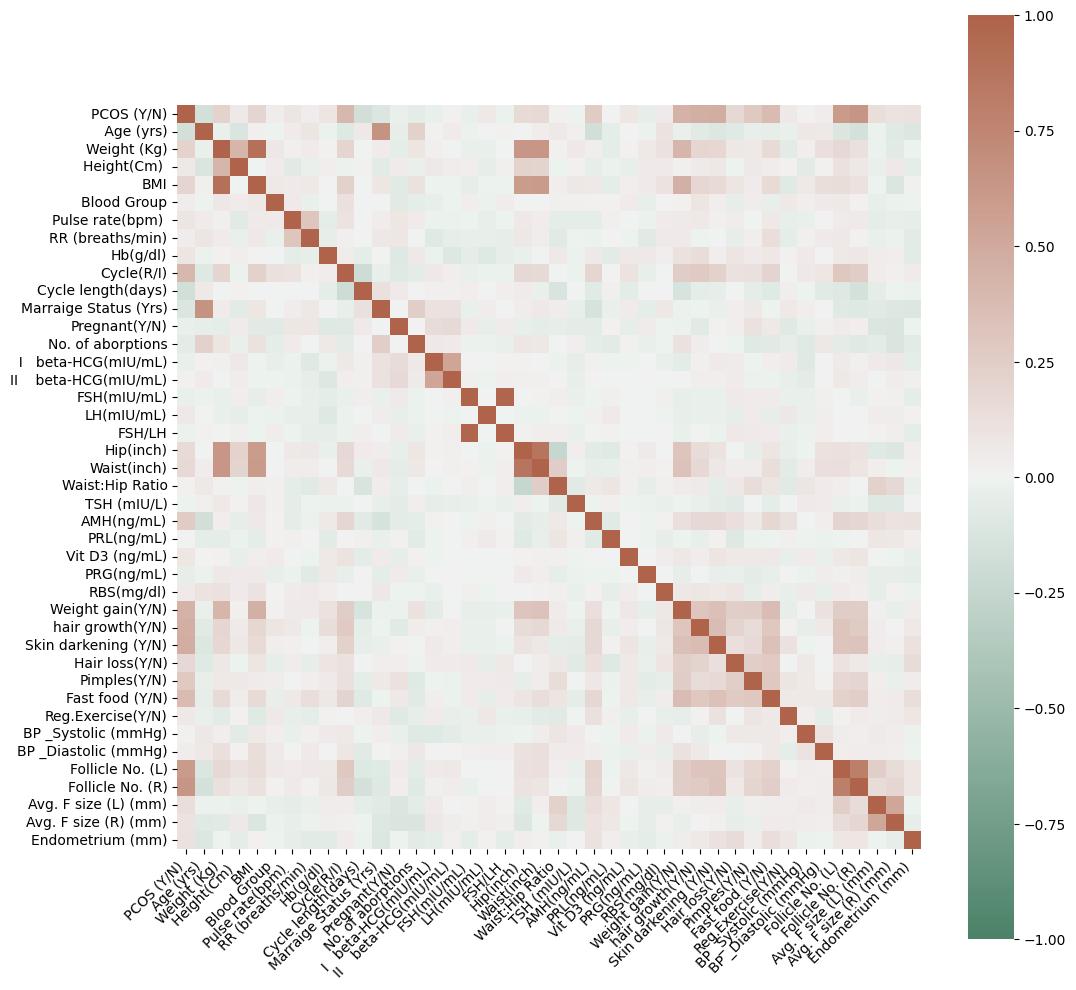

In [7]:
# change the default setting of the figure using rcParams
rcParams["figure.figsize"] = 12, 12
rcParams["figure.dpi"] = 100

# calculate the correlation of the variables
corr = df.corr()

# create the heatmap
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(150, 25, s=60, as_cmap=True),
    square=True,
)
# add tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

## Remove the 3 variables that have high correlation scores.

[Text(0.5, 0, 'PCOS (Y/N)'),
 Text(1.5, 0, ' Age (yrs)'),
 Text(2.5, 0, 'Weight (Kg)'),
 Text(3.5, 0, 'Height(Cm) '),
 Text(4.5, 0, 'Blood Group'),
 Text(5.5, 0, 'Pulse rate(bpm) '),
 Text(6.5, 0, 'RR (breaths/min)'),
 Text(7.5, 0, 'Hb(g/dl)'),
 Text(8.5, 0, 'Cycle(R/I)'),
 Text(9.5, 0, 'Cycle length(days)'),
 Text(10.5, 0, 'Marraige Status (Yrs)'),
 Text(11.5, 0, 'Pregnant(Y/N)'),
 Text(12.5, 0, 'No. of aborptions'),
 Text(13.5, 0, '  I   beta-HCG(mIU/mL)'),
 Text(14.5, 0, 'II    beta-HCG(mIU/mL)'),
 Text(15.5, 0, 'FSH(mIU/mL)'),
 Text(16.5, 0, 'LH(mIU/mL)'),
 Text(17.5, 0, 'Hip(inch)'),
 Text(18.5, 0, 'Waist:Hip Ratio'),
 Text(19.5, 0, 'TSH (mIU/L)'),
 Text(20.5, 0, 'AMH(ng/mL)'),
 Text(21.5, 0, 'PRL(ng/mL)'),
 Text(22.5, 0, 'Vit D3 (ng/mL)'),
 Text(23.5, 0, 'PRG(ng/mL)'),
 Text(24.5, 0, 'RBS(mg/dl)'),
 Text(25.5, 0, 'Weight gain(Y/N)'),
 Text(26.5, 0, 'hair growth(Y/N)'),
 Text(27.5, 0, 'Skin darkening (Y/N)'),
 Text(28.5, 0, 'Hair loss(Y/N)'),
 Text(29.5, 0, 'Pimples(Y/N)'),
 Text(

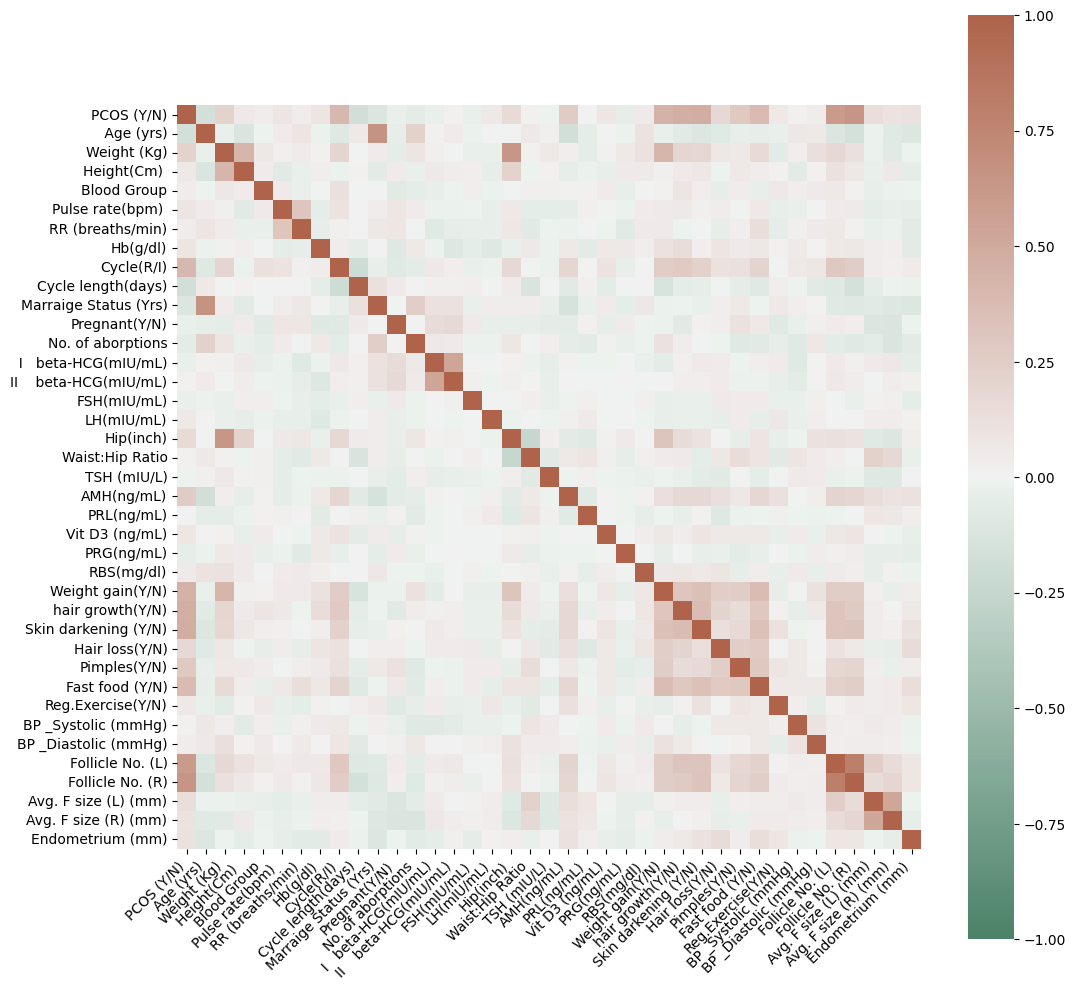

In [8]:
## remove BMI, FSH/LH, Waist(inch)
df = df.drop(["BMI","FSH/LH","Waist(inch)"],axis=1)

# reproduce the correlation plot
ax = sns.heatmap(
    df.corr(),
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(150, 25, s=60, as_cmap=True),
    square=True,
)
# add tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

In [9]:
# save the cleaned dataframe
df.to_csv("../Data/Cleaned/data.csv",index=False)